In [2]:
#Import The Necessary Library
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
#Load The Dataset That is on .CSV FIle 
data=pd.read_csv('/content/drive/MyDrive/project/Dataset/IMDB-Dataset.csv')
#Head() Is Used the Show the first 5 Rows Of the Dataset 
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
#Check The Shape Of The Dataset 
print ('Shape = >',data.shape)

Shape = > (50000, 2)


In [5]:
#Count the Numbers Of sentiment And Not sentiment  sentiment Result On the Dataset It Also Uses To Check The Dataset Is Balanced OR InBalanced Dataset 
#'1' For sentiment sentiment And '0' For Not sentiment
print ('Senti-negit-1 and senti-posit-0  counts','\n',data.sentiment.value_counts())

Senti-negit-1 and senti-posit-0  counts 
 negative    25000
positive    25000
Name: sentiment, dtype: int64


In [6]:
#To Check The NuLL Values If Dataset Have 
data.isnull().sum() 

review       0
sentiment    0
dtype: int64

In [7]:
#ADD the Length_of_sentiment Coulmn of sentiment Articel length That Show Each Article Length OF sentiment 
data['length_of_review'] = data.review.str.len()
data.head(2)

,review,sentiment,length_of_review
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998


In [8]:
#Remove the Accent For the review Column 
from unicodedata import normalize
remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
data['review'] = data['review'].apply(remove_accent)

In [9]:
#Convert itno the Lower case
data['review'] = data['review'].str.lower()

In [10]:
#Remove the Punctution 
data['review']= data['review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
data['review'] = data['review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
data['review'] = data['review'].str.replace(r'£|\$', 'dollers')
data['review'] = data['review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
data['review'] = data['review'].str.replace(r'\d+(\.\d+)?', 'numbr')
data['review'] = data['review'].str.replace(r'[^\w\d\s]', ' ')
data['review'] = data['review'].str.replace(r'\s+', ' ')
data['review'] = data['review'].str.replace(r'^\s+|\s+?$', '')

In [11]:
#Import The Library From NLTK
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
#For Message
import string
from nltk.corpus import  stopwords
#Remove the Stopwords And We Also Those Stopwards That We Want To ADD On The Stopward List 
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','<br/>'])
data['review']= data['review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [13]:
#ADD the clean_Length_of_Headine Coulmn of review  Articel length That Show Each Article Length OF review   After Pre-Processing The Each Article
data['clean_length_review'] = data.review.str.len()
data.head()

,review,sentiment,length_of_review,clean_length_review
0,one reviewers mentioned watching numbr oz epis...,positive,1761,1127
1,wonderful little production br br filming tech...,positive,998,674
2,thought wonderful way spend time hot summer we...,positive,926,590
3,basically family little boy jake thinks zombie...,negative,748,463
4,petter mattei love time money visually stunnin...,positive,1317,876


In [14]:
#Check Th Length of review Each Article Of review Column Before 
print ('Original_Length', data.length_of_review.sum())
#Check Th Length of review Each Article Of review Column After 
print ('Clean_Length', data.clean_length_review.sum())

Original_Length 65471551
Clean_Length 41764139


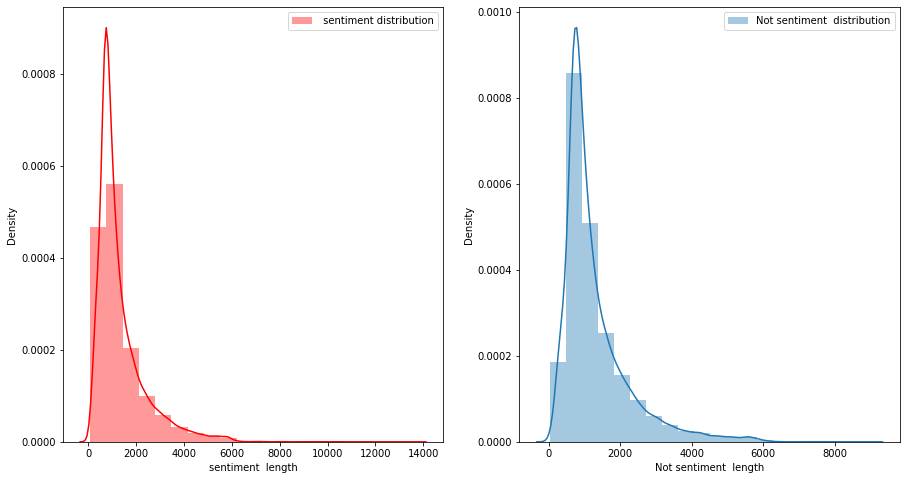

In [15]:
#Show Them it With Help matplotlib Graph Before The  length Of News Column Being Pre-Process 
f,ax = plt.subplots(1,2,figsize = (15,8))
sns.distplot(data[data['sentiment']=='positive']['length_of_review'],bins=20,ax=ax[0],label=' sentiment distribution',color='r')
ax[0].set_xlabel('sentiment  length')
ax[0].legend()
sns.distplot(data[data['sentiment']=='negative']['length_of_review'],bins=20,ax=ax[1],label='Not sentiment  distribution')
ax[1].set_xlabel('Not sentiment  length')
ax[1].legend()
plt.show()

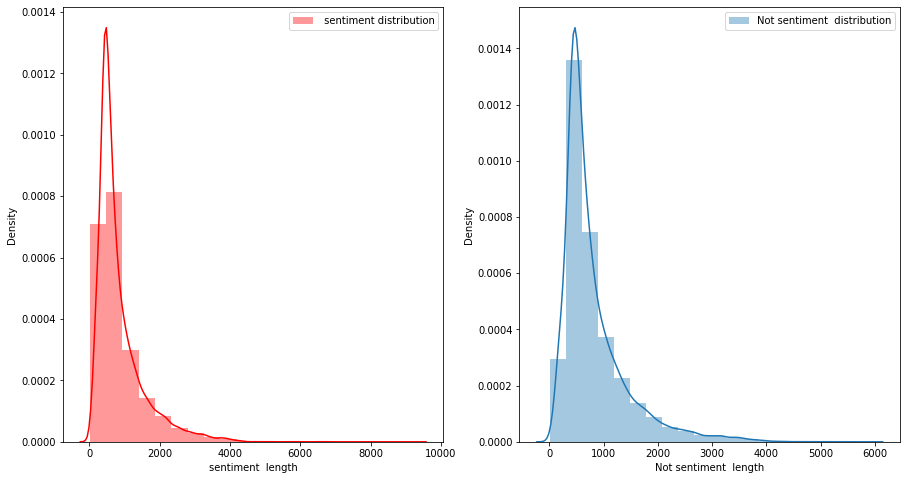

In [16]:
#Show Them it With Help matplotlib Graph Before The  length Of News Column Being Pre-Process 
f,ax = plt.subplots(1,2,figsize = (15,8))
sns.distplot(data[data['sentiment']=='positive']['clean_length_review'],bins=20,ax=ax[0],label=' sentiment distribution',color='r')
ax[0].set_xlabel('sentiment  length')
ax[0].legend()
sns.distplot(data[data['sentiment']=='negative']['clean_length_review'],bins=20,ax=ax[1],label='Not sentiment  distribution')
ax[1].set_xlabel('Not sentiment  length')
ax[1].legend()
plt.show()

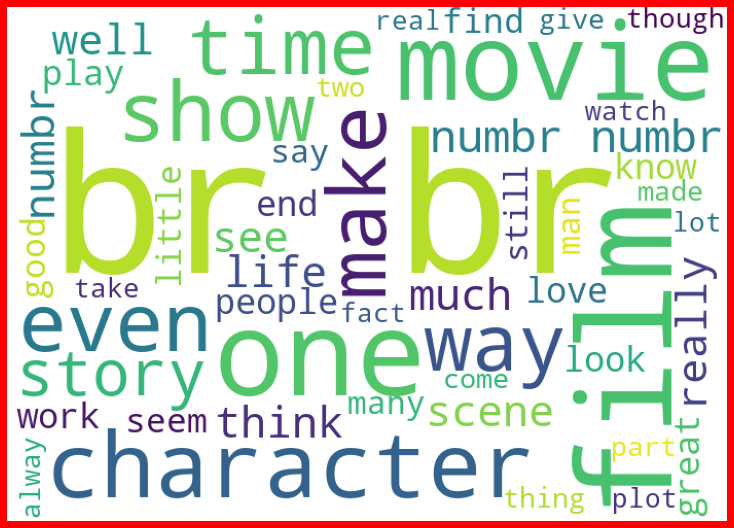

In [17]:
# Word Cloud  displays a list of words, the importance of each being shown with font size or color Of the news column of Not sentiment 
from wordcloud import WordCloud
spams = data['review'][data['sentiment']=='positive']
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

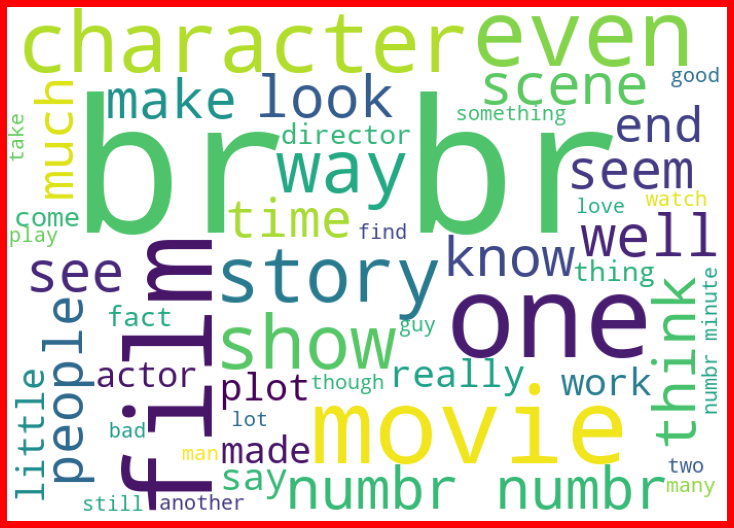

In [18]:
# Word Cloud  displays a list of words, the importance of each being shown with font size or color Of the news column of Not sentiment 
from wordcloud import WordCloud
spams = data['review'][data['sentiment']=='negative']
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
from sklearn import preprocessing#Label Encoder is use to convert string column value into integer 
lb=preprocessing.LabelEncoder()

In [20]:
data['sentiment']=lb.fit_transform(data['sentiment'])

In [21]:
data.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [22]:
#Assigng the news column into Variable 't'
t= data["review"].iloc[0:50000]
print(t)

0        one reviewers mentioned watching numbr oz epis...
1        wonderful little production br br filming tech...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 50000, dtype: object


In [23]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')
#Tokenize and Lemmatize
from nltk import stem
stemmer = stem.SnowballStemmer('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [24]:
import gensim
# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
#from nltk.stem import *
import numpy as np
np.random.seed(400)

In [25]:
# writing function for the entire dataset
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))

    result=" ".join(result)        
    return result
        

In [26]:
 #tfidf vectorizer to assign a vectorize value 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.feature_extraction.text import CountVectorizer
#Train test split to split the dataset into xtrain xtest ytrain ytest 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#ngram_range=(1,2)
tf_vec = TfidfVectorizer(ngram_range=(2,2))
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(t.apply(preprocess))
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_transformed = tf_transformer.transform(X_train_counts)



#feature=tf_vec.fit_transform(X_train_counts)
x=X_train_transformed
y=data['sentiment']

In [27]:
X_train,x_test,Y_train,y_test = train_test_split(x,y,random_state=42)

In [28]:
#Import the model algo 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
#Assing the parameter 
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [30]:
clfs = {'SVC' : svc,'KN'  : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [31]:
#Here We Fit The Model With Loop
def train(clf, features, targets):    
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [32]:
pred_scores_word_vectors = []
pred_scores_word = []
pred_scores = []
for k,v in clfs.items():
    train(v, X_train, Y_train)
    pred = predict(v, x_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))
    pred_scores_word.append((k, [confusion_matrix(y_test , pred)]))
    pred_scores.append((k, [classification_report(y_test , pred)]))

In [33]:
#To  Check The Accuracy Score For Different algo
for i in range(len(pred_scores_word_vectors)):
  print(pred_scores_word_vectors[i])

('SVC', [0.88936])
('KN', [0.79616])
('NB', [0.85744])
('DT', [0.71888])
('LR', [0.8796])
('RF', [0.82208])


In [34]:
#Fill into to Dataframe 
predictions=pd.DataFrame(pred_scores_word_vectors,columns=['Index',"score"])
predictions

,Index,score
0,SVC,[0.88936]
1,KN,[0.79616]
2,NB,[0.85744]
3,DT,[0.71888]
4,LR,[0.8796]
5,RF,[0.82208]


In [35]:
# Here To Check the Confusion Matrix  For Different algo
for i in range(len(pred_scores_word)):
  print(pred_scores_word[i],'\n')

('SVC', [array([[5402,  755],
       [ 628, 5715]])]) 

('KN', [array([[4611, 1546],
       [1002, 5341]])]) 

('NB', [array([[5301,  856],
       [ 926, 5417]])]) 

('DT', [array([[4461, 1696],
       [1818, 4525]])]) 

('LR', [array([[5311,  846],
       [ 659, 5684]])]) 

('RF', [array([[4972, 1185],
       [1039, 5304]])]) 



In [36]:
# Here To Check the Classification Report  For Different algo And Also Check the F1-Score 
for i in range(len(pred_scores)):
  print(pred_scores[i])

('SVC', ['              precision    recall  f1-score   support\n\n           0       0.90      0.88      0.89      6157\n           1       0.88      0.90      0.89      6343\n\n    accuracy                           0.89     12500\n   macro avg       0.89      0.89      0.89     12500\nweighted avg       0.89      0.89      0.89     12500\n'])
('KN', ['              precision    recall  f1-score   support\n\n           0       0.82      0.75      0.78      6157\n           1       0.78      0.84      0.81      6343\n\n    accuracy                           0.80     12500\n   macro avg       0.80      0.80      0.80     12500\nweighted avg       0.80      0.80      0.80     12500\n'])
('NB', ['              precision    recall  f1-score   support\n\n           0       0.85      0.86      0.86      6157\n           1       0.86      0.85      0.86      6343\n\n    accuracy                           0.86     12500\n   macro avg       0.86      0.86      0.86     12500\nweighted avg     

In [37]:
from sklearn.externals import joblib#SAve The Best Model 
joblib.dump(SVC, 'best.pkl')
print ("Best Model (Naive Bayes) Saved")


Best Model (Naive Bayes) Saved
